# Iris Dataset Notebook

![iris_species](http://jidan.sinkpoint.com/images/tf_logisticregression_deco.png)






## Introduction
In this notebook I will be explaining the basic functions of displaying the iris dataset & demonstrating the difficulties of seperating the three classes of iris based on the variables in the dataset.I will be using an incredibly popular data management library called Pandas.

### Importing libraries 

In [1]:
# Importing the libraries
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
from sklearn import metrics
%matplotlib inline

### Reading the dataset raw, and displaying it
I am loading the dataset using url in order to make it simpler to read and not to overcomplicate things,then displaying snippet of it.

In [2]:
# Load dataset using url

#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = pd.read_csv(url, names=names)
#dataset.head()


# Load dataset using file

dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Information
When working with a certain dataset it is very important to check it properly before working with it , so summary of the database is very important.

In [3]:
#printing the shape

print(dataset.shape)

(150, 6)


In [4]:
#more info on the data

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None


In [5]:
# description of the dataset

print(dataset.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
#class distribution

print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [7]:
#displaying the dataset table without a certain column can be very useful tool, 
##in this example I am going to drop the class column just to show how the function works and can be used.

dataset = dataset.drop('Id',axis=1)

dataset.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Displaying the iris dataset on histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021EE31765C0>,
      dtype=object)

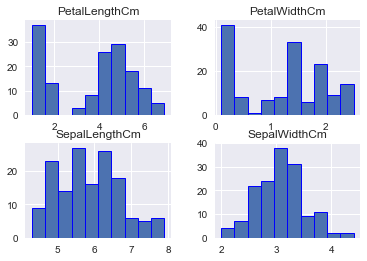

In [8]:
dataset.hist(edgecolor='blue',bins =10, linewidth=1)

## Difficulties faced with iris set 
Setosa is very easy to separate from the other two, but virginica and versicolor have some overlap.
I will show you a great example by plotting it below.

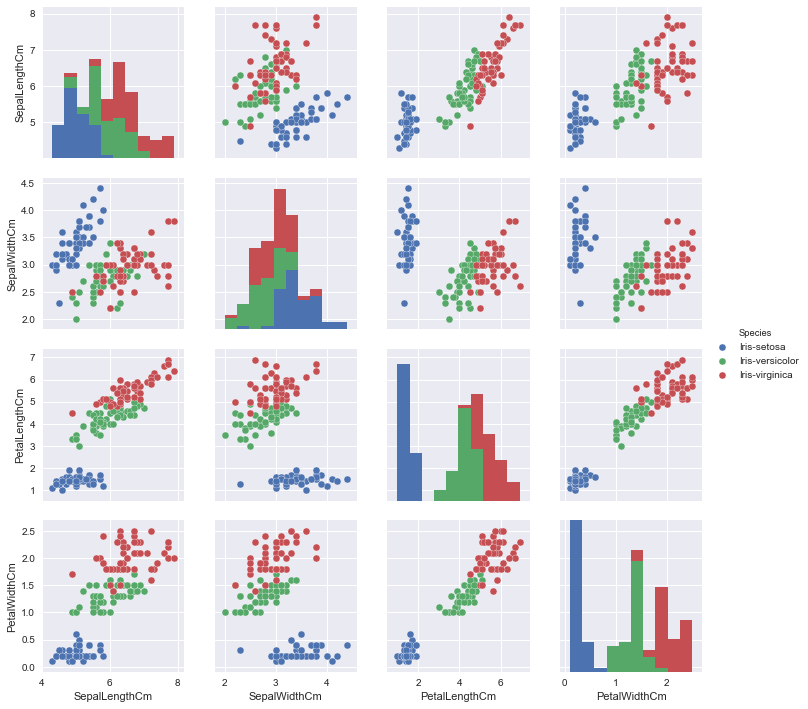

In [9]:
sns.pairplot(dataset, hue="Species")


## Implementing k-Nearest Neighbors in this dataset.
In this section I will demonstrate how to implement k-Nearest Neighbors algorithm in order to specify the classification problems faced with the Iris flowers dataset.
It is a very easy algorithm to understand and implement but also a very powerful tool to have.

In [10]:
#Splitting the data into training and test data in this case it split 80% to train data and 20% to test data 
train, test = train_test_split(dataset, test_size = 0.2)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [11]:
train_X = train[['PetalLengthCm','PetalWidthCm', 'SepalLengthCm','SepalWidthCm']]# Select flower features on train data
train_y=train.Species# print the output of train data
test_X= test[['PetalLengthCm','PetalWidthCm', 'SepalLengthCm','SepalWidthCm']] #  Select flower features on test data
test_y =test.Species   #print the output of test data

In [12]:
#KNN
#Searches in the 3 closest neighbours
model_knn=KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(train_X,train_y)
prediction_knn=model_knn.predict(test_X)
print(prediction_knn)
print('Model {KNN} accuracy:',metrics.accuracy_score(prediction_knn,test_y))

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']
Model {KNN} accuracy: 1.0


In [13]:
train_petals_X = train[['PetalLengthCm','PetalWidthCm']]# Select flower features on train data
train_petals_y=train.Species  # print the output of train data
test_petals_X= test[['PetalLengthCm','PetalWidthCm']] #  Select flower features on test data
test_petals_y =test.Species   #print the output of test data

In [14]:
#KNN (Petals feature Only)
model_petals=KNeighborsClassifier(n_neighbors=3)
model_petals.fit(train_petals_X,train_petals_y)
prediction_petals=model_petals.predict(test_petals_X)
print('Change in accuracy : %f' % 
(metrics.accuracy_score(prediction_petals,test_petals_y) - metrics.accuracy_score(prediction_knn,test_y)))

Change in accuracy : 0.000000


## References:
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation

https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://www.kaggle.com/darkwolf91/easy-intro-to-machine-learning-with-iris